In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from tqdm import tqdm

In [40]:
std_norm_dist = sts.norm()


def experiment():
    x = std_norm_dist.rvs(12)
    pearson_r, counter = 0, 0

    while pearson_r > 0.97:
        y = std_norm_dist.rvs(12)
        pearson_r = np.corrcoef(x, y)[0, 1]
        counter += 1
    return counter

In [4]:
rho_distribution = lambda number_of_experiments: sts.beta(
    number_of_experiments / 2 - 1, number_of_experiments / 2 - 1, loc=-1, scale=2
)
rho_distribution(12).sf(0.97)

np.float64(9.098864694298869e-08)

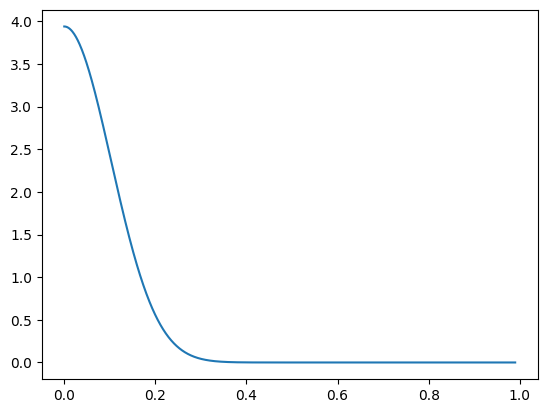

In [5]:
rho_linspace = np.linspace(0, 0.99, 1000)
plt.plot(rho_linspace, rho_distribution(100).pdf(rho_linspace))

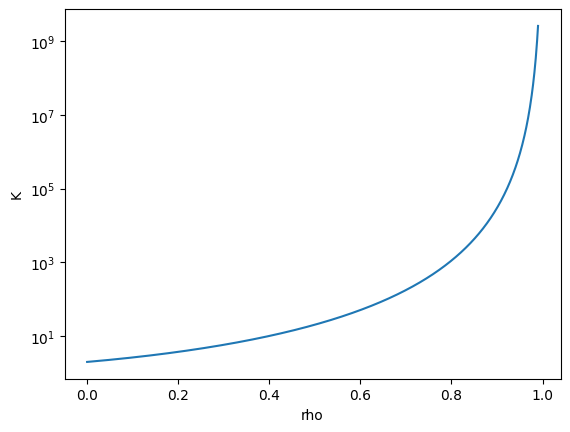

In [67]:
rho_linspace = np.linspace(0, 0.99, 1000)
plt.plot(rho_linspace, 1 / rho_distribution(12).sf(rho_linspace))
plt.yscale("log")
plt.xlabel("rho")
plt.ylabel("K")
plt.savefig("../static/task4/rho_k_dependency.png")